In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_half_hour=pd.read_csv('SDL.csv')
df_half_hour.isna().sum()

valid        0
tmpf       130
dwpf       135
relh       181
drct     14394
sknt      3940
alti        29
mslp      4661
vsby       273
dtype: int64

In [3]:
filter_df=df_half_hour
filter_df

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby
0,1/1/2010 0:53,58.0,20.0,22.61,0.0,0.0,30.30,1025.4,10.0
1,1/1/2010 1:53,54.0,22.0,28.39,30.0,3.0,30.31,1025.8,10.0
2,1/1/2010 2:53,52.0,23.0,31.96,0.0,0.0,30.32,1026.2,10.0
3,1/1/2010 3:53,49.0,23.0,35.80,0.0,0.0,30.33,1026.4,10.0
4,1/1/2010 4:53,46.0,25.0,43.34,0.0,0.0,30.33,1026.6,10.0
...,...,...,...,...,...,...,...,...,...
134007,10/20/2024 19:53,75.0,36.0,24.20,NaN,5.0,30.15,1019.4,10.0
134008,10/20/2024 20:53,76.0,37.0,24.35,190.0,5.0,30.13,1018.7,10.0
134009,10/20/2024 21:53,79.0,37.0,22.05,0.0,0.0,30.12,1018.3,10.0
134010,10/20/2024 22:53,78.0,37.0,22.79,260.0,4.0,30.10,1017.8,10.0


In [4]:
# Ensure the 'valid' column is in datetime format
filter_df['valid'] = pd.to_datetime(filter_df['valid'])

# Add a 'date' column for easier grouping
filter_df['date'] = filter_df['valid'].dt.date

# Find rows with the maximum temperature for each day
daily_max_temp = filter_df.loc[filter_df.groupby('date')['tmpf'].idxmax()].reset_index(drop=True)

# Inspect the result
daily_max_temp.drop(columns=['valid'],inplace=True)
daily_max_temp


,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,date
0,67.0,14.0,12.74,NaN,3.0,30.14,1019.7,10.0,2010-01-01
1,69.0,26.0,19.77,310.0,5.0,30.03,1015.7,10.0,2010-01-02
2,71.0,23.0,16.26,0.0,0.0,30.07,1017.3,10.0,2010-01-03
3,72.0,21.0,14.51,120.0,6.0,30.07,1017.2,10.0,2010-01-04
4,71.0,25.0,17.67,240.0,4.0,30.05,1016.3,10.0,2010-01-05
...,...,...,...,...,...,...,...,...,...
5402,94.0,39.0,14.78,180.0,7.0,29.81,1006.8,10.0,2024-10-16
5403,90.0,38.0,16.10,270.0,6.0,29.78,1006.2,10.0,2024-10-17
5404,83.0,47.0,28.45,250.0,3.0,29.71,1003.7,10.0,2024-10-18
5405,69.0,37.0,30.84,140.0,4.0,30.06,1016.3,10.0,2024-10-19


In [5]:
daily_max_temp['temp_c'] = (daily_max_temp['tmpf'] - 32) * 5/9

# Drop the old column if needed
daily_max_temp.drop(columns=['tmpf'], inplace=True)

daily_max_temp

,dwpf,relh,drct,sknt,alti,mslp,vsby,date,temp_c
0,14.0,12.74,NaN,3.0,30.14,1019.7,10.0,2010-01-01,19.444444
1,26.0,19.77,310.0,5.0,30.03,1015.7,10.0,2010-01-02,20.555556
2,23.0,16.26,0.0,0.0,30.07,1017.3,10.0,2010-01-03,21.666667
3,21.0,14.51,120.0,6.0,30.07,1017.2,10.0,2010-01-04,22.222222
4,25.0,17.67,240.0,4.0,30.05,1016.3,10.0,2010-01-05,21.666667
...,...,...,...,...,...,...,...,...,...
5402,39.0,14.78,180.0,7.0,29.81,1006.8,10.0,2024-10-16,34.444444
5403,38.0,16.10,270.0,6.0,29.78,1006.2,10.0,2024-10-17,32.222222
5404,47.0,28.45,250.0,3.0,29.71,1003.7,10.0,2024-10-18,28.333333
5405,37.0,30.84,140.0,4.0,30.06,1016.3,10.0,2024-10-19,20.555556


In [6]:
percentile_90 = np.percentile(daily_max_temp['temp_c'], 90)
print(f"90th Percentile of max_temp_c: {percentile_90}")
daily_max_temp.drop(columns=['date'], inplace=True)
daily_max_temp

90th Percentile of max_temp_c: 41.111111111111114


,dwpf,relh,drct,sknt,alti,mslp,vsby,temp_c
0,14.0,12.74,NaN,3.0,30.14,1019.7,10.0,19.444444
1,26.0,19.77,310.0,5.0,30.03,1015.7,10.0,20.555556
2,23.0,16.26,0.0,0.0,30.07,1017.3,10.0,21.666667
3,21.0,14.51,120.0,6.0,30.07,1017.2,10.0,22.222222
4,25.0,17.67,240.0,4.0,30.05,1016.3,10.0,21.666667
...,...,...,...,...,...,...,...,...
5402,39.0,14.78,180.0,7.0,29.81,1006.8,10.0,34.444444
5403,38.0,16.10,270.0,6.0,29.78,1006.2,10.0,32.222222
5404,47.0,28.45,250.0,3.0,29.71,1003.7,10.0,28.333333
5405,37.0,30.84,140.0,4.0,30.06,1016.3,10.0,20.555556


In [7]:
daily_max_temp.isna().sum()

dwpf        0
relh        1
drct      964
sknt      139
alti        2
mslp       47
vsby        6
temp_c      0
dtype: int64

In [8]:
daily_max_temp = daily_max_temp.ffill() 

In [9]:
daily_max_temp['drct'] = daily_max_temp['drct'].fillna(daily_max_temp['drct'].mean()) 
daily_max_temp.isna().sum()

dwpf      0
relh      0
drct      0
sknt      0
alti      0
mslp      0
vsby      0
temp_c    0
dtype: int64

In [10]:
daily_max_temp.to_csv('daily_max_temp_SDL.csv', index=False)

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam  # Import the Adam optimizer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Normalize data
def normalize_data(data):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Create sequences for training/testing
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Build and compile LSTM model
def build_lstm_model(input_shape, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(input_shape[-1]))  # Output neurons equal to feature count
    
    # Create the Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    
    # Compile the model with the optimizer and loss function
    model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])
    return model

# Plot loss, accuracy, and predictions
def plot_metrics_and_predictions(history, y_test_rescaled, predictions_rescaled, temp_c_index):
    # Loss and Validation Loss Plot
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Predictions vs Actuals for temp_c
    plt.figure(figsize=(10, 4))
    plt.plot(predictions_rescaled[:, temp_c_index], label="Predicted temp_c")
    plt.plot(y_test_rescaled[:, temp_c_index], label="Actual temp_c")
    plt.xlabel("Time")
    plt.ylabel("Temperature (temp_c)")
    plt.legend()
    plt.show()


def iterative_forecast_map(model, x_test, days_to_predict, scaler):
    n_samples, seq_len, n_features = x_test.shape
    prediction_dict = {}

    for step in range(1, days_to_predict + 1):
        predictions = []  # Store predictions for this step
        for i in range(n_samples - step + 1):
            # Get the initial sequence for the current sample
            sequence = x_test[i].copy()
            
            # Use `seq_len - step` actual values and the remaining from predictions
            for t in range(step - 1):
                prediction = model.predict(sequence[np.newaxis, :, :])  # Add batch dimension
                prediction = prediction.reshape(1, n_features)  # Ensure correct shape
                sequence = np.vstack((sequence[1:], prediction))  # Update sequence

            # Final prediction for the current step
            final_prediction = model.predict(sequence[np.newaxis, :, :])
            predictions.append(final_prediction[0])

        # Convert predictions to array and inverse transform
        predictions = scaler.inverse_transform(np.array(predictions))

        # Store in dictionary with correct slicing
        prediction_dict[step] = predictions.reshape(-1, 1, n_features)

    return prediction_dict




In [ ]:
from keras.models import load_model

# Initialize variables
sequence_length =3

# Make a copy of the original DataFrame to update
updated_data = daily_max_temp.copy()

# Index of temp_c column
temp_c_index = updated_data.columns.get_loc('temp_c')

# Normalize and create sequences
scaled_data, scaler = normalize_data(updated_data)
X, y = create_sequences(scaled_data, sequence_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(f"data X train shape: {X_train.shape},data X test shape: {X_test.shape}")
print(f"data y train shape: {y_train.shape},data y test shape: {y_test.shape}")

# Train-validation split
val_split = int(len(X_train) * 0.2)
X_val, y_val = X_train[-val_split:], y_train[-val_split:]
X_train, y_train = X_train[:-val_split], y_train[:-val_split]

# Train LSTM model
learning_rate = 0.001  # Specify the desired learning rate
model = build_lstm_model((X_train.shape[1], X_train.shape[2]), learning_rate=learning_rate)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1)


data X train shape: (4323, 3, 8),data X test shape: (1081, 3, 8)
data y train shape: (4323, 8),data y test shape: (1081, 8)
Epoch 1/75


c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1681 - mae: 0.3127 - val_loss: 0.0537 - val_mae: 0.1554
Epoch 2/75
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0631 - mae: 0.1636 - val_loss: 0.0505 - val_mae: 0.1455
Epoch 3/75
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0606 - mae: 0.1561 - val_loss: 0.0501 - val_mae: 0.1453
Epoch 4/75
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0584 - mae: 0.1531 - val_loss: 0.0485 - val_mae: 0.1400
Epoch 5/75
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0575 - mae: 0.1485 - val_loss: 0.0482 - val_mae: 0.1389
Epoch 6/75
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0564 - mae: 0.1469 - val_loss: 0.0485 - val_mae: 0.1402
Epoch 7/75
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0562 - mae: 0.1476 - val_loss: 0.0477 - val_mae: 0.1366
Epoch 8/75
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0559 - mae: 0.1452 - val_loss: 0.0484 - val_mae: 0.1391
Epoch 9/75
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0553 

In [ ]:
# # Save the trained model
# model.save('model.keras')

# # Save the training history
# np.save('history.npy', history.history)

# print("Model and training history saved successfully.")

Model and training history saved successfully.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


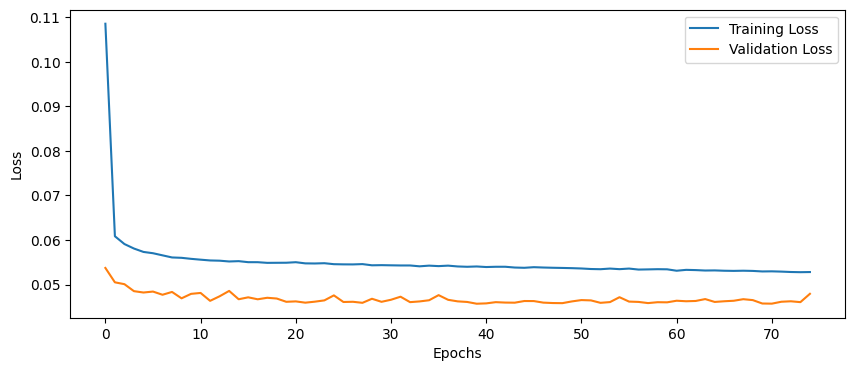

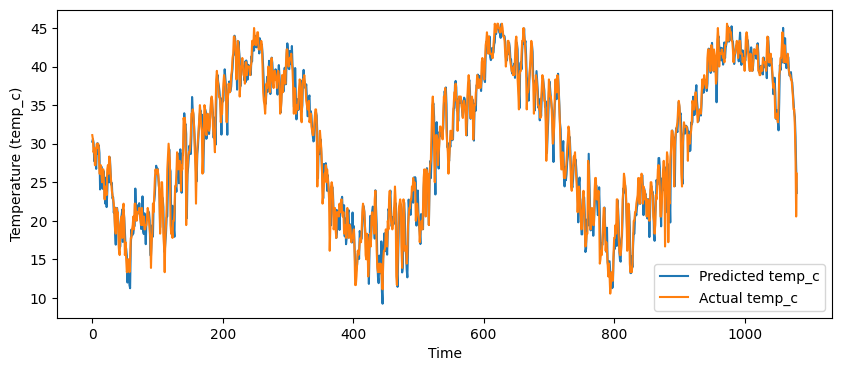

In [13]:
# Predict and rescale
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)
# Plot metrics and predictions for temp_c
plot_metrics_and_predictions(history, y_test_rescaled, predictions_rescaled, temp_c_index)

In [14]:
# Calculate RMSE, MAE, and R² for temp_c
rmse = np.sqrt(mean_squared_error(y_test_rescaled[:, temp_c_index], predictions_rescaled[:, temp_c_index]))
mae = mean_absolute_error(y_test_rescaled[:, temp_c_index], predictions_rescaled[:, temp_c_index])
r2 = r2_score(y_test_rescaled[:, temp_c_index], predictions_rescaled[:, temp_c_index])
print(f"Feature: temp_c")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R²: {r2:.4f}")

Feature: temp_c
  RMSE: 1.8469
  MAE: 1.3405
  R²: 0.9592


In [15]:
days_to_predict=4
predictions = iterative_forecast_map(model, X_test, days_to_predict, scaler)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [ ]:
# import pickle
# # Save prediction_dict to a file
# with open('prediction_dict.pkl', 'wb') as file:
#     pickle.dump(predictions, file)

# print("prediction_dict saved successfully.")

prediction_dict saved successfully.


In [28]:
import pickle

# Load prediction_dict from the file
with open('prediction_dict.pkl', 'rb') as file:
    predictions = pickle.load(file)

print("prediction_dict loaded successfully.")


prediction_dict loaded successfully.


1081
1081


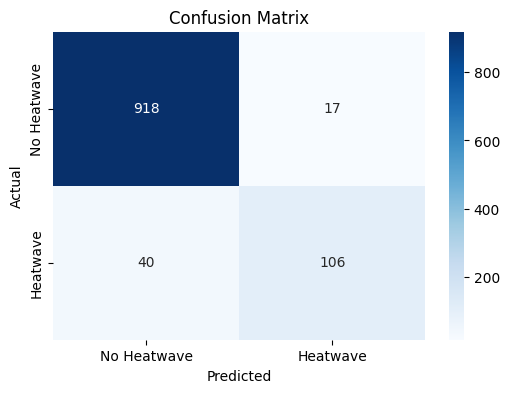

Precision: 0.86
Recall: 0.73
F1 Score: 0.79


In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Function to classify each day based on specified criteria
def classify_heatwave(data, threshold):
    heatwave = [0] * len(data)  # Initialize the heatwave list with zeros
    for i in range(2, len(data)):
        if data[i] >= threshold:
            if data[i-1] >= threshold and data[i-2] >= threshold:
                heatwave[i] = 1
                heatwave[i-1] = 1
                heatwave[i-2] = 1
            else:
                heatwave[i] = 0
        else:
            heatwave[i] = 0
    return heatwave

# Ensure heatwave_df is created correctly
threshold = np.percentile(daily_max_temp["temp_c"], 90)
y_test_rescaled_df=pd.DataFrame(y_test_rescaled)
# Apply the function to classify each day
heatwave_flags = classify_heatwave(y_test_rescaled_df[temp_c_index].values, threshold)
actual1_test = y_test_rescaled_df.copy()
actual1_test["day_included_heatwave"] = heatwave_flags
predictions_rescaled_df=pd.DataFrame(predictions_rescaled)
# Apply the function to classify each day
heatwave_flags = classify_heatwave(predictions_rescaled_df[temp_c_index].values, threshold)
# Create a DataFrame with the classification results
predctions_comp_test = predictions_rescaled_df.copy()
predctions_comp_test["day_included_heatwave"] = heatwave_flags


print(len(actual1_test))
print(len(predctions_comp_test))

# Extract heatwave columns
y_true = actual1_test['day_included_heatwave']
y_pred = predctions_comp_test['day_included_heatwave']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heatwave', 'Heatwave'], yticklabels=['No Heatwave', 'Heatwave'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate precision, recall, accuracy, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



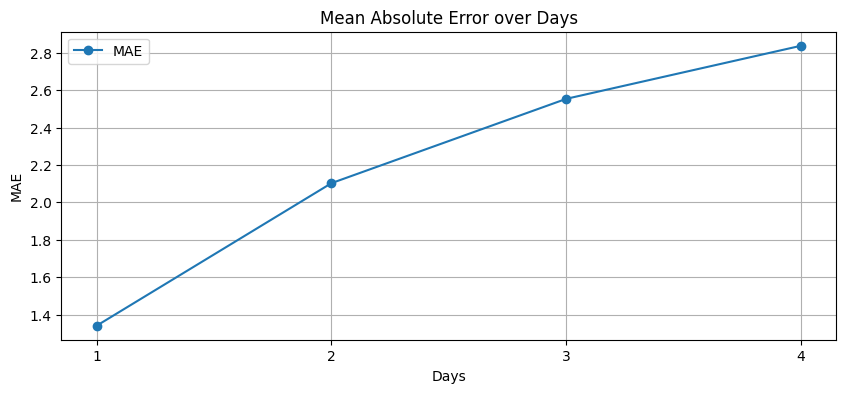

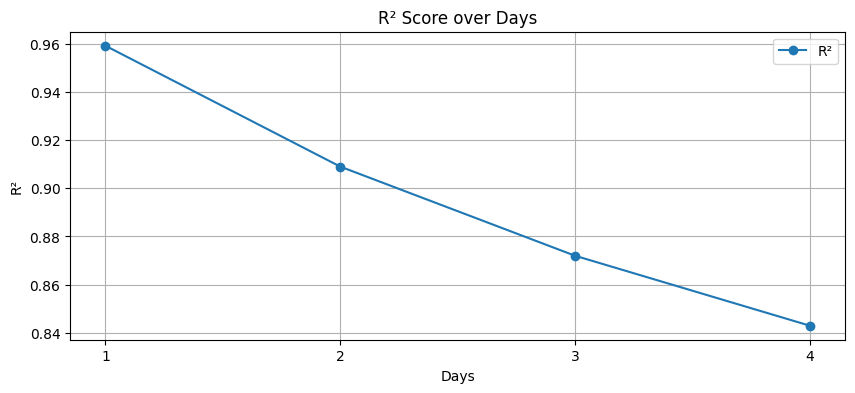

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

prediction_dict = predictions
actual_values = pd.DataFrame(y_test_rescaled).copy()

# Initialize lists to store metrics
all_mae = []
all_r2 = []

# Loop through each horizon in prediction_dict
for step in range(1, len(prediction_dict) + 1):    
    # Get predictions for the current horizon
    prediction = pd.DataFrame(predictions[step].reshape(len(actual_values) - (step - 1), 8))
    
    # Slice actual values to align with predictions
    temperory_actual_values = actual_values.iloc[step - 1:].copy()
    
    # Extract actual and predicted temperature values
    y_true = temperory_actual_values[temp_c_index]
    y_pred = prediction[temp_c_index]
    
    # Compute evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Append metrics to lists
    all_mae.append(mae)
    all_r2.append(r2)
    

# Plot MAE over days
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(all_mae) + 1), all_mae, label='MAE', marker='o')
plt.xlabel("Days")
plt.ylabel("MAE")
plt.title("Mean Absolute Error over Days")
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(all_mae) + 1))  # Set x-axis ticks to be integer days
plt.show()

# Plot R² over days
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(all_r2) + 1), all_r2, label='R²', marker='o')
plt.xlabel("Days")
plt.ylabel("R²")
plt.title("R² Score over Days")
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(all_r2) + 1))  # Set x-axis ticks to be integer days
plt.show()


prediction num 1

Precision: 0.86
Recall: 0.73
F1 Score: 0.79


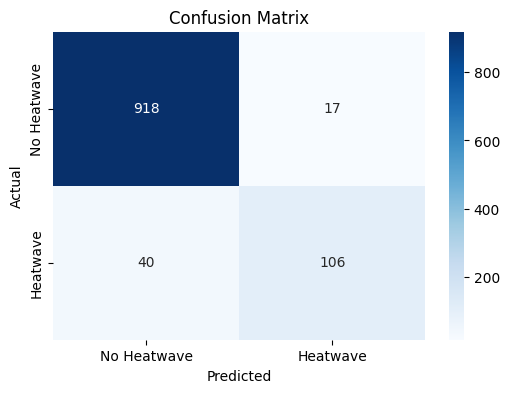

prediction num 2

Precision: 0.80
Recall: 0.68
F1 Score: 0.73


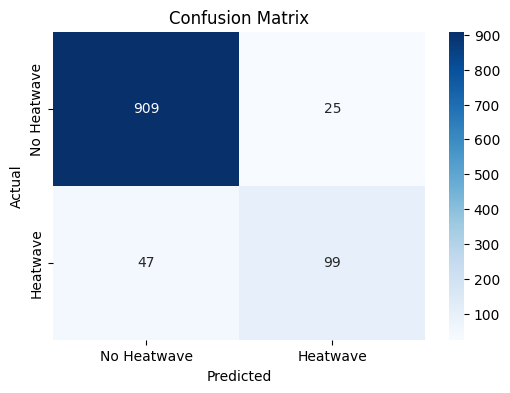

prediction num 3

Precision: 0.72
Recall: 0.58
F1 Score: 0.64


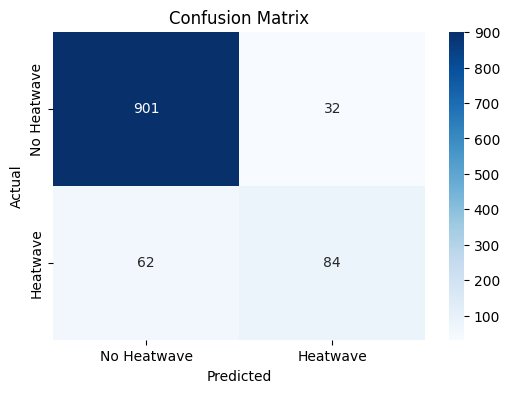

prediction num 4

Precision: 0.69
Recall: 0.47
F1 Score: 0.56


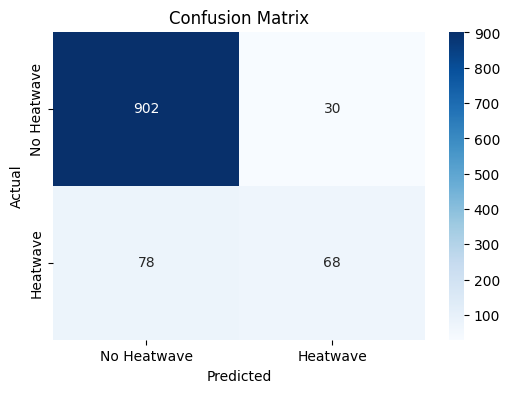

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

threshold = np.percentile(daily_max_temp["temp_c"], 90)

# Function to classify each day based on specified criteria
def classify_heatwave(data, threshold):
    # Convert data to NumPy array if it's a DataFrame or Series
    if isinstance(data, (pd.DataFrame, pd.Series)):
        data = data.values
    heatwave = [0] * len(data)  # Initialize the heatwave list with zeros
    for i in range(2, len(data)):
        if data[i] >= threshold:
            if data[i-1] >= threshold and data[i-2] >= threshold:
                heatwave[i] = 1
                heatwave[i-1] = 1
                heatwave[i-2] = 1
            else:
                heatwave[i] = 0
        else:
            heatwave[i] = 0
    return heatwave

# Example actual values (replace with your actual data)
actual_values = pd.DataFrame(y_test_rescaled).copy()

# Example prediction_dict (replace with your actual prediction_dict)
prediction_dict = predictions

# Initialize lists to store results
all_Precision = []
all_recall = []
all_f1score = []

# Loop through each horizon in prediction_dict
for step in range(1, len(prediction_dict) + 1):
    print(f"prediction num {step}\n")
    
    # Get predictions for the current horizon
    prediction = pd.DataFrame(predictions[step].reshape(len(actual_values) - (step - 1), 8))
    
    # Slice actual values to align with predictions
    temperory_actual_values = actual_values.iloc[step - 1:].copy()
    
    # Classify heatwave for actual values
    actual_heatwave_flags = classify_heatwave(temperory_actual_values[temp_c_index], threshold)
    temperory_actual_values["day_included_heatwave"] = actual_heatwave_flags
    
    # Classify heatwave for predicted values
    prediction_values_heatwave_flags = classify_heatwave(prediction[temp_c_index], threshold)
    prediction["day_included_heatwave"] = prediction_values_heatwave_flags
    
    # Extract heatwave columns
    y_true = temperory_actual_values['day_included_heatwave']
    y_pred = prediction['day_included_heatwave']
    
    # Compute evaluation metrics
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Append metrics to lists
    all_Precision.append(precision)
    all_recall.append(recall)
    all_f1score.append(f1)
    
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heatwave', 'Heatwave'], yticklabels=['No Heatwave', 'Heatwave'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

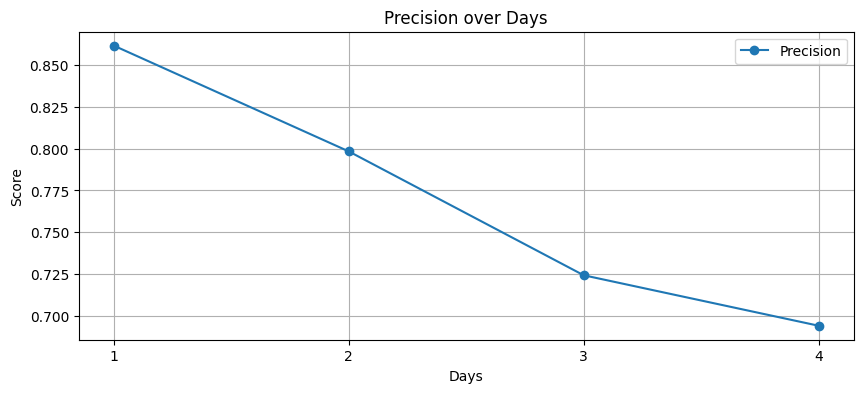

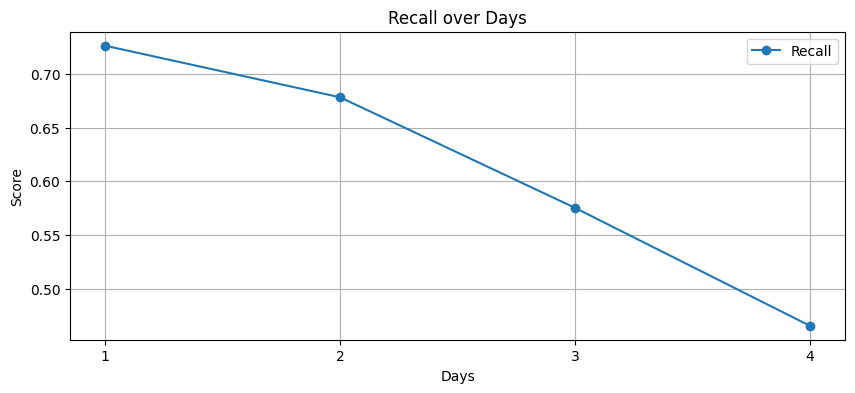

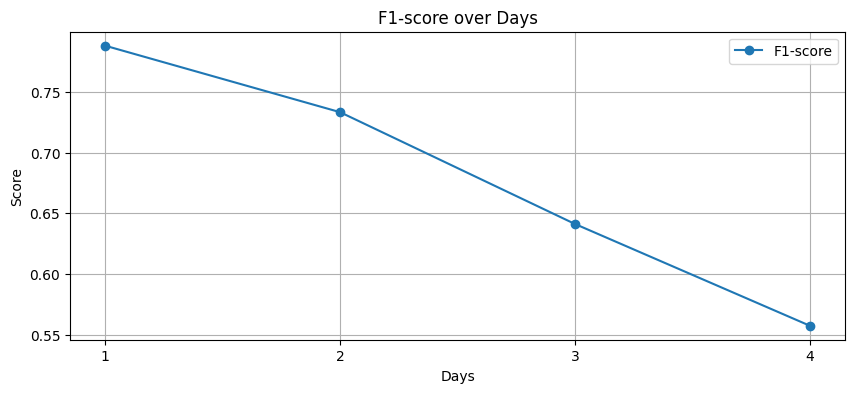

In [19]:
import matplotlib.pyplot as plt

# Create a range for the days based on the length of the metrics
days = list(range(1, len(all_f1score) + 1))

# Plot Precision
plt.figure(figsize=(10, 4))
plt.plot(days, all_Precision, label='Precision', marker='o')
plt.xlabel("Days")
plt.ylabel("Score")
plt.title("Precision over Days")
plt.legend()
plt.grid(True)
plt.xticks(days)  # Set x-axis ticks to be integer days
plt.show()

# Plot Recall
plt.figure(figsize=(10, 4))
plt.plot(days, all_recall, label='Recall', marker='o')
plt.xlabel("Days")
plt.ylabel("Score")
plt.title("Recall over Days")
plt.legend()
plt.grid(True)
plt.xticks(days)  # Set x-axis ticks to be integer days
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 4))
plt.plot(days, all_f1score, label='F1-score', marker='o')
plt.xlabel("Days")
plt.ylabel("Score")
plt.title("F1-score over Days")
plt.legend()
plt.grid(True)
plt.xticks(days)  # Set x-axis ticks to be integer days
plt.show()


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,626 (143.07 KB)

 Trainable params: 12,208 (47.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,418 (95.39 KB)